In [1]:
hw_done = False    ## change this to True to mark your homework as done.

### ASTR-324, University of Washington
# Homework 2


## Problem 1

The file `data/flux.txt` contains a series of calibrated measurements of the flux of a star (in some arbitrary flux units).

Assuming the star is not variable, estimate:
1. the true stellar flux and the error of that estimate and
1. the precision of my measurement apparatus.

## Problem 2

Test scores in ASTR 324 class at the University of Washington have historically been normally distributed with $\mu = 85$ and $\sigma=7$. Assuming past predicts the future:

1. Compute the probability you will score 100 or greater when you take the test.
1. Compute the number of your classmates who will score between 84 and 92 (the class has 26 students; assume everyone will take the test).
1. If I tell you the probability of failing the test (i.e., scoring below some threshold $T$) is 0.018%, compute the threshold $T$.

Note: you should find [the functions of `scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) very useful.

## Problem 3

Generate a sample of 10,000 data values drawn from N($\mu$=1.0, $\sigma$=0.2) and
draw a histogram, with the bin size determined using the Freedman-Diaconis
rule. Show (Poissonian) uncertainty for each histogram value, and overplot the
true distribution. Do the same for a Cauchy distribution with the same $\mu$ and $\gamma=0.2$. 

"Poissonian uncertainty": for each bin in the histogram, plot the error bar whose half-width is the square root of the bin height.

## Problem 4
Repeat the previous problem, but now concatenate wit the Gaussian sample 
another sample of 10,000 data values drawn from a Cauchy distribution with
$\mu=2.0$ and $\gamma=0.5$. Do it twice: once with the bin size determined 
using the Freedman-Diaconis rule and once using the Scott's rule. Discuss the difference.  

# Solutions

### Some useful definitions and functions

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
from scipy.stats import cauchy, norm, sem
import seaborn as sns; sns.set() # set default plot styles
from astroML.plotting import setup_text_plots
from astroML.stats import sigmaG
from astroML.plotting import hist as fancyhist
setup_text_plots(fontsize=14, usetex=False)

## Problem 1

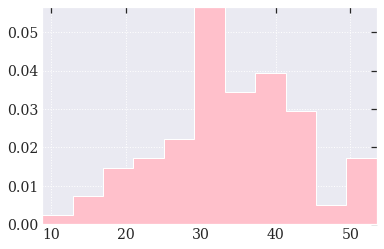

flux estimate: 33.962 ± 0.908
apparatus precision: ±9.082


In [3]:
flux = np.loadtxt('data/flux.txt')
N = len(flux)

# Let's plot the dataset to make sure it doesn't have any oddities
plt.hist(flux, bins='fd', color='pink', histtype='stepfilled', density=True)
plt.show()

# Now compute the mean, and the standard error of the mean
f = flux.mean()
s = flux.std(ddof=1)
ferr = sem(flux)
print(f"flux estimate: {f:.3f} ± {ferr:.3f}")
print(f"apparatus precision: ±{s:.3f}")

## Problem 2

Test scores in ASTR 324 class at the University of Washington have historically been normally distributed with $\mu = 85$ and $\sigma=7$. Assuming past predicts the future:

1. Compute the probability you will score 100 or greater when you take the test.
1. Compute the number of your classmates who will score between 84 and 92 (the class has 26 students; assume everyone will take the test).
1. If I tell you the probability of failing the test (i.e., scoring below some threshold $T$) is 0.018%, compute the threshold $T$.

Note: you should find [the functions of `scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) very useful.

In [4]:
from scipy.stats import norm

p = norm(85, 7)

print("The probability of scoring above 100 in a test is {:.4f}".format(     1. - p.cdf(100)             ))
print("The number of classmates scoring between 84 and 92 is {:.4f}".format( 26*(p.cdf(92) - p.cdf(84))  ))
print("The failure threshold {:.4f}".format(                                 p.ppf(0.018/100)            ))

The probability of scoring above 100 in a test is 0.0161
The number of classmates scoring between 84 and 92 is 10.3517
The failure threshold 60.0254


To further understand where the above comes from, re-read/re-watch the section introducing the Gaussian distribution in Week 3 lectures.

## Problem 3
Generate a sample of 10,000 data values drawn from N(1,0.2) and draw a pretty histogram, with the bin size determined using the Freedman-Diaconis rule. Show (Poissonian) uncertainty for each histogram value, and overplot the true distribution.


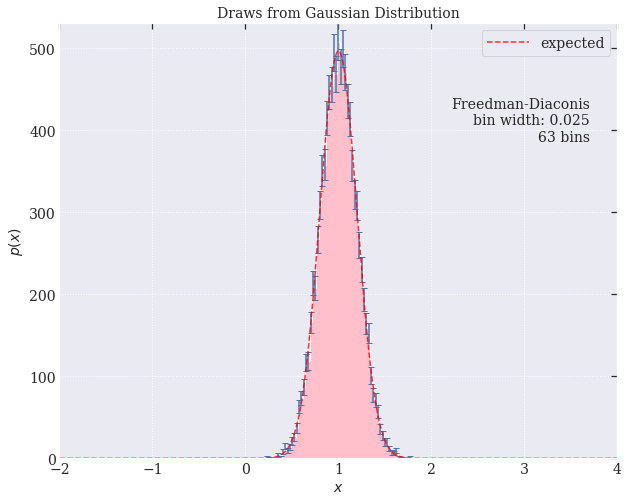

In [5]:
### this code taken from (and modified)
### http://www.astroml.org/book_figures/chapter5/fig_hist_binsize.html
def plot_fancy_histogram(style, data, name, ax=None):
    counts, bins, patches = ax.hist(data, bins=style, histtype='stepfilled', color='pink')
    bincenters = 0.5 * (bins[1:] + bins[:-1])  
    binwidth = bins[1] - bins[0]
    # plot error bars for any bin with non-zero value
    countsErr = np.sqrt(counts)
    ax.errorbar(bincenters[counts > 0], counts[counts > 0], countsErr[counts > 0], fmt='none')

    ax.text(0.95, 0.83, '%s\nbin width: %.3f\n%i bins' % (name, binwidth, len(counts)),
            transform=ax.transAxes,
            ha='right', va='top')

    return binwidth

### this code taken from the lecture (and modified)
### https://github.com/uw-astr-324-s19/astr-324-s19/blob/master/notebooks/Week-2-Thu.ipynb

# 1) draw k=10,000 numbers from N(mu=1.0, sigma=0.2) 
np.random.seed(42)
k = 10000
mu = 1.0
sigma = 0.2
xData = norm(mu, sigma).rvs(k) # here we draw k numbers from N(mu, sigma)

## now plot the histogram of values
fig, ax = plt.subplots(figsize=(10, 8))
binwidth = plot_fancy_histogram('fd', xData, 'Freedman-Diaconis', ax=ax)

# expected gaussian distribution
xGrid = np.linspace(-2, 4, 1000)
gaussL = k*binwidth*norm(mu, sigma).pdf(xGrid)
plt.plot(xGrid, gaussL, ls='--', c='red', label='expected', alpha = 0.8)

plt.xlim(-2.0, 4.0)
plt.xlabel('$x$')
plt.ylabel(r'$p(x)$')
plt.title('Draws from Gaussian Distribution')
plt.legend()
plt.show()

Now the same for a Cauchy distribution with the same $\mu$ and $\gamma=0.2$. 

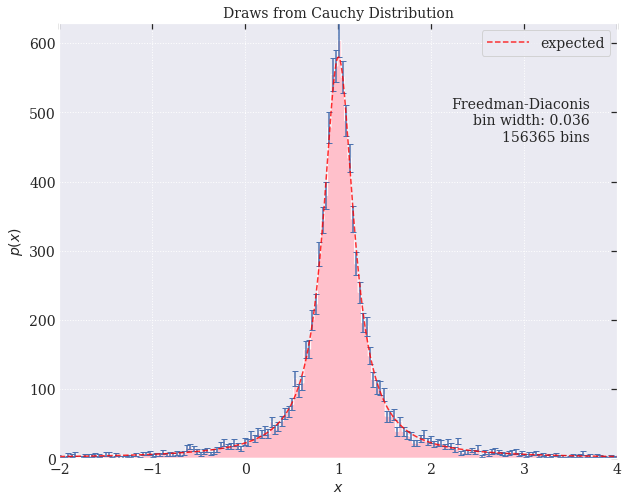

In [6]:
# 1) draw k=10,000 numbers from Cauchy(mu=1.0, sigma=0.2) 
np.random.seed(42)
k = 10000
mu = 1.0
gamma = 0.2
xData = cauchy(mu, gamma).rvs(k)

## now plot the histogram of values
fig, ax = plt.subplots(figsize=(10, 8))

# histogram the data
binwidth = plot_fancy_histogram('fd', xData, 'Freedman-Diaconis', ax=ax)

# expected distribution
xGrid = np.linspace(-2, 4, 1000)
cauchyL = k*binwidth*cauchy(mu, gamma).pdf(xGrid)
plt.plot(xGrid, cauchyL, ls='--', c='red', label='expected', alpha = 0.8)

plt.xlim(-2.0, 4.0)
plt.xlabel('$x$')
plt.ylabel(r'$p(x)$')
plt.title('Draws from Cauchy Distribution')
plt.legend()
plt.show()

## Problem 4
Repeat the problem 2, but now add to the Gaussian sample (concatenate arrays) 
another sample of 10,000 data values drawn from a Cauchy distribution with
$\mu=2.0$ and $\gamma=0.5$. Do it twice: once with the bin size determined 
using the Freedman-Diaconis rule and once using the Scott's rule. Comment.  

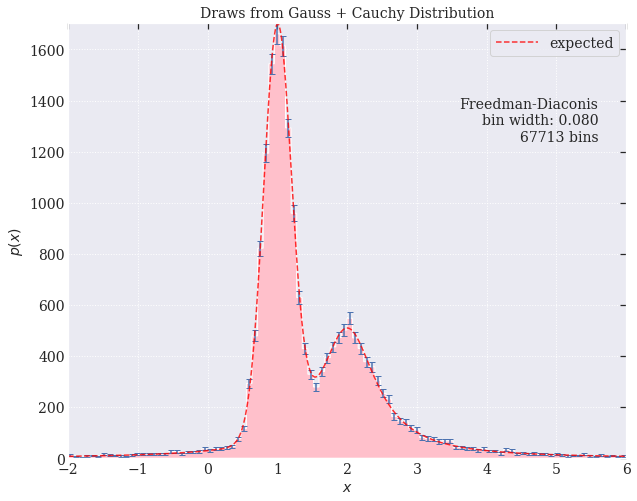

In [7]:
# draw k=10,000 numbers from N(mu=1.0, sigma=0.2) 
# and another k=10,000 numbers from Cauchy(mu=2.0, sigma=0.5) 
np.random.seed(42)
k1 = 10000
mu = 1.0
sigma = 0.2
xDataG = norm(mu, sigma).rvs(k1)  
k2 = 10000
mu2 = 2.0 
gamma = 0.5
xDataC = cauchy(mu2, gamma).rvs(k2)  
k = k1 + k2
xData = np.concatenate((xDataG, xDataC), axis=0)

## now plot the histogram of values
fig, ax = plt.subplots(figsize=(10, 8))
binwidth = plot_fancy_histogram('fd', xData, 'Freedman-Diaconis', ax=ax)

# expected distribution
xGrid = np.linspace(-2, 6, 1000)
gaussL = norm(mu, sigma).pdf(xGrid)   
cauchyL = cauchy(mu2, gamma).pdf(xGrid)  
expectedD = binwidth * (k1*gaussL + k2*cauchyL)
plt.plot(xGrid, expectedD, ls='--', c='red', label='expected', alpha = 0.8)

plt.xlim(-2.0, 6.0)
plt.xlabel('$x$')
plt.ylabel(r'$p(x)$')
plt.title('Draws from Gauss + Cauchy Distribution')
plt.legend()
plt.show()

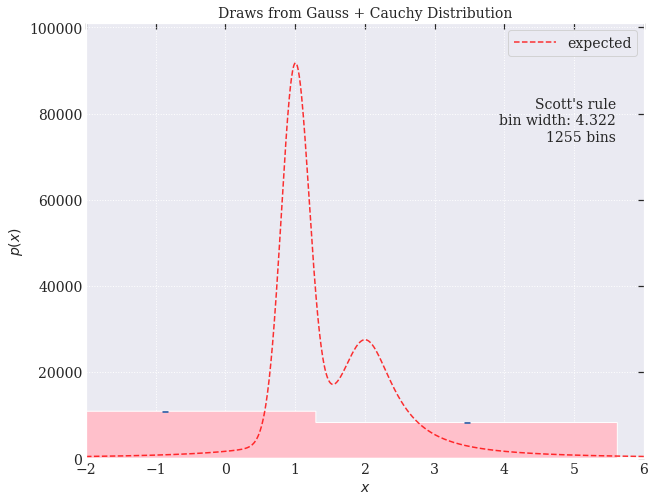

In [8]:
## now for Scott's rule
fig, ax = plt.subplots(figsize=(10, 8))

binwidth = plot_fancy_histogram('scott', xData, 'Scott\'s rule', ax=ax)

expectedD = binwidth * (k1*gaussL + k2*cauchyL)
plt.plot(xGrid, expectedD, ls='--', c='red', label='expected', alpha = 0.8)

plt.xlim(-2.0, 6.0)
plt.ylim(0, 1.1*expectedD.max())
plt.xlabel('$x$')
plt.ylabel(r'$p(x)$')
plt.title('Draws from Gauss + Cauchy Distribution')
plt.legend()
plt.show()

The histogram above looks poor because Scott's rule is sensitive to outliers, and Cauchy distribution is prone to generating outliers (we've talked about both of these things in class).

Depending on how (un)lucky you have been in the draw, sometimes the histogram can't even be plotted (e.g., your Python may run out of memory because Scott's rule generate too many bins).